The code below shows the implementaion of a single full adder circuit. The circuit diagram of the adder is:
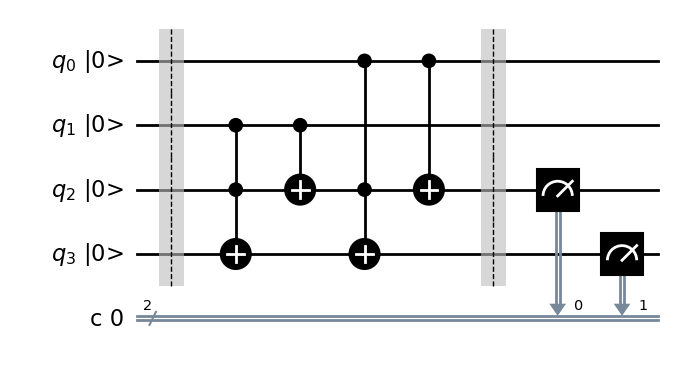

In [ ]:
#A single full adder circuit

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

#Create quantum circuit with 4 qubits and 2 classical bits
fa = QuantumCircuit(4,2)

#fa.x(0)  #--if c_(i-1) = 1
#fa.x(1)  #--if a_i = 1
#fa.x(2)  #--if b_i = 1
fa.barrier()

#Full adder logic
fa.ccx(1,2,3)
fa.cx(1,2)
fa.ccx(0,2,3)
fa.cx(0,2)
fa.barrier()

#Measuring the sum and output carry qubits
fa.measure(2,0)
fa.measure(3,1)

#Simulating the circuit
backend = AerSimulator()
fa_compiled = transpile(fa, backend)
job_sim = backend.run(fa_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(fa_compiled)
plot_histogram(counts)

Next, we create full adder circuit for two 4-bit numbers using 4 single full adders. The circuit look like :
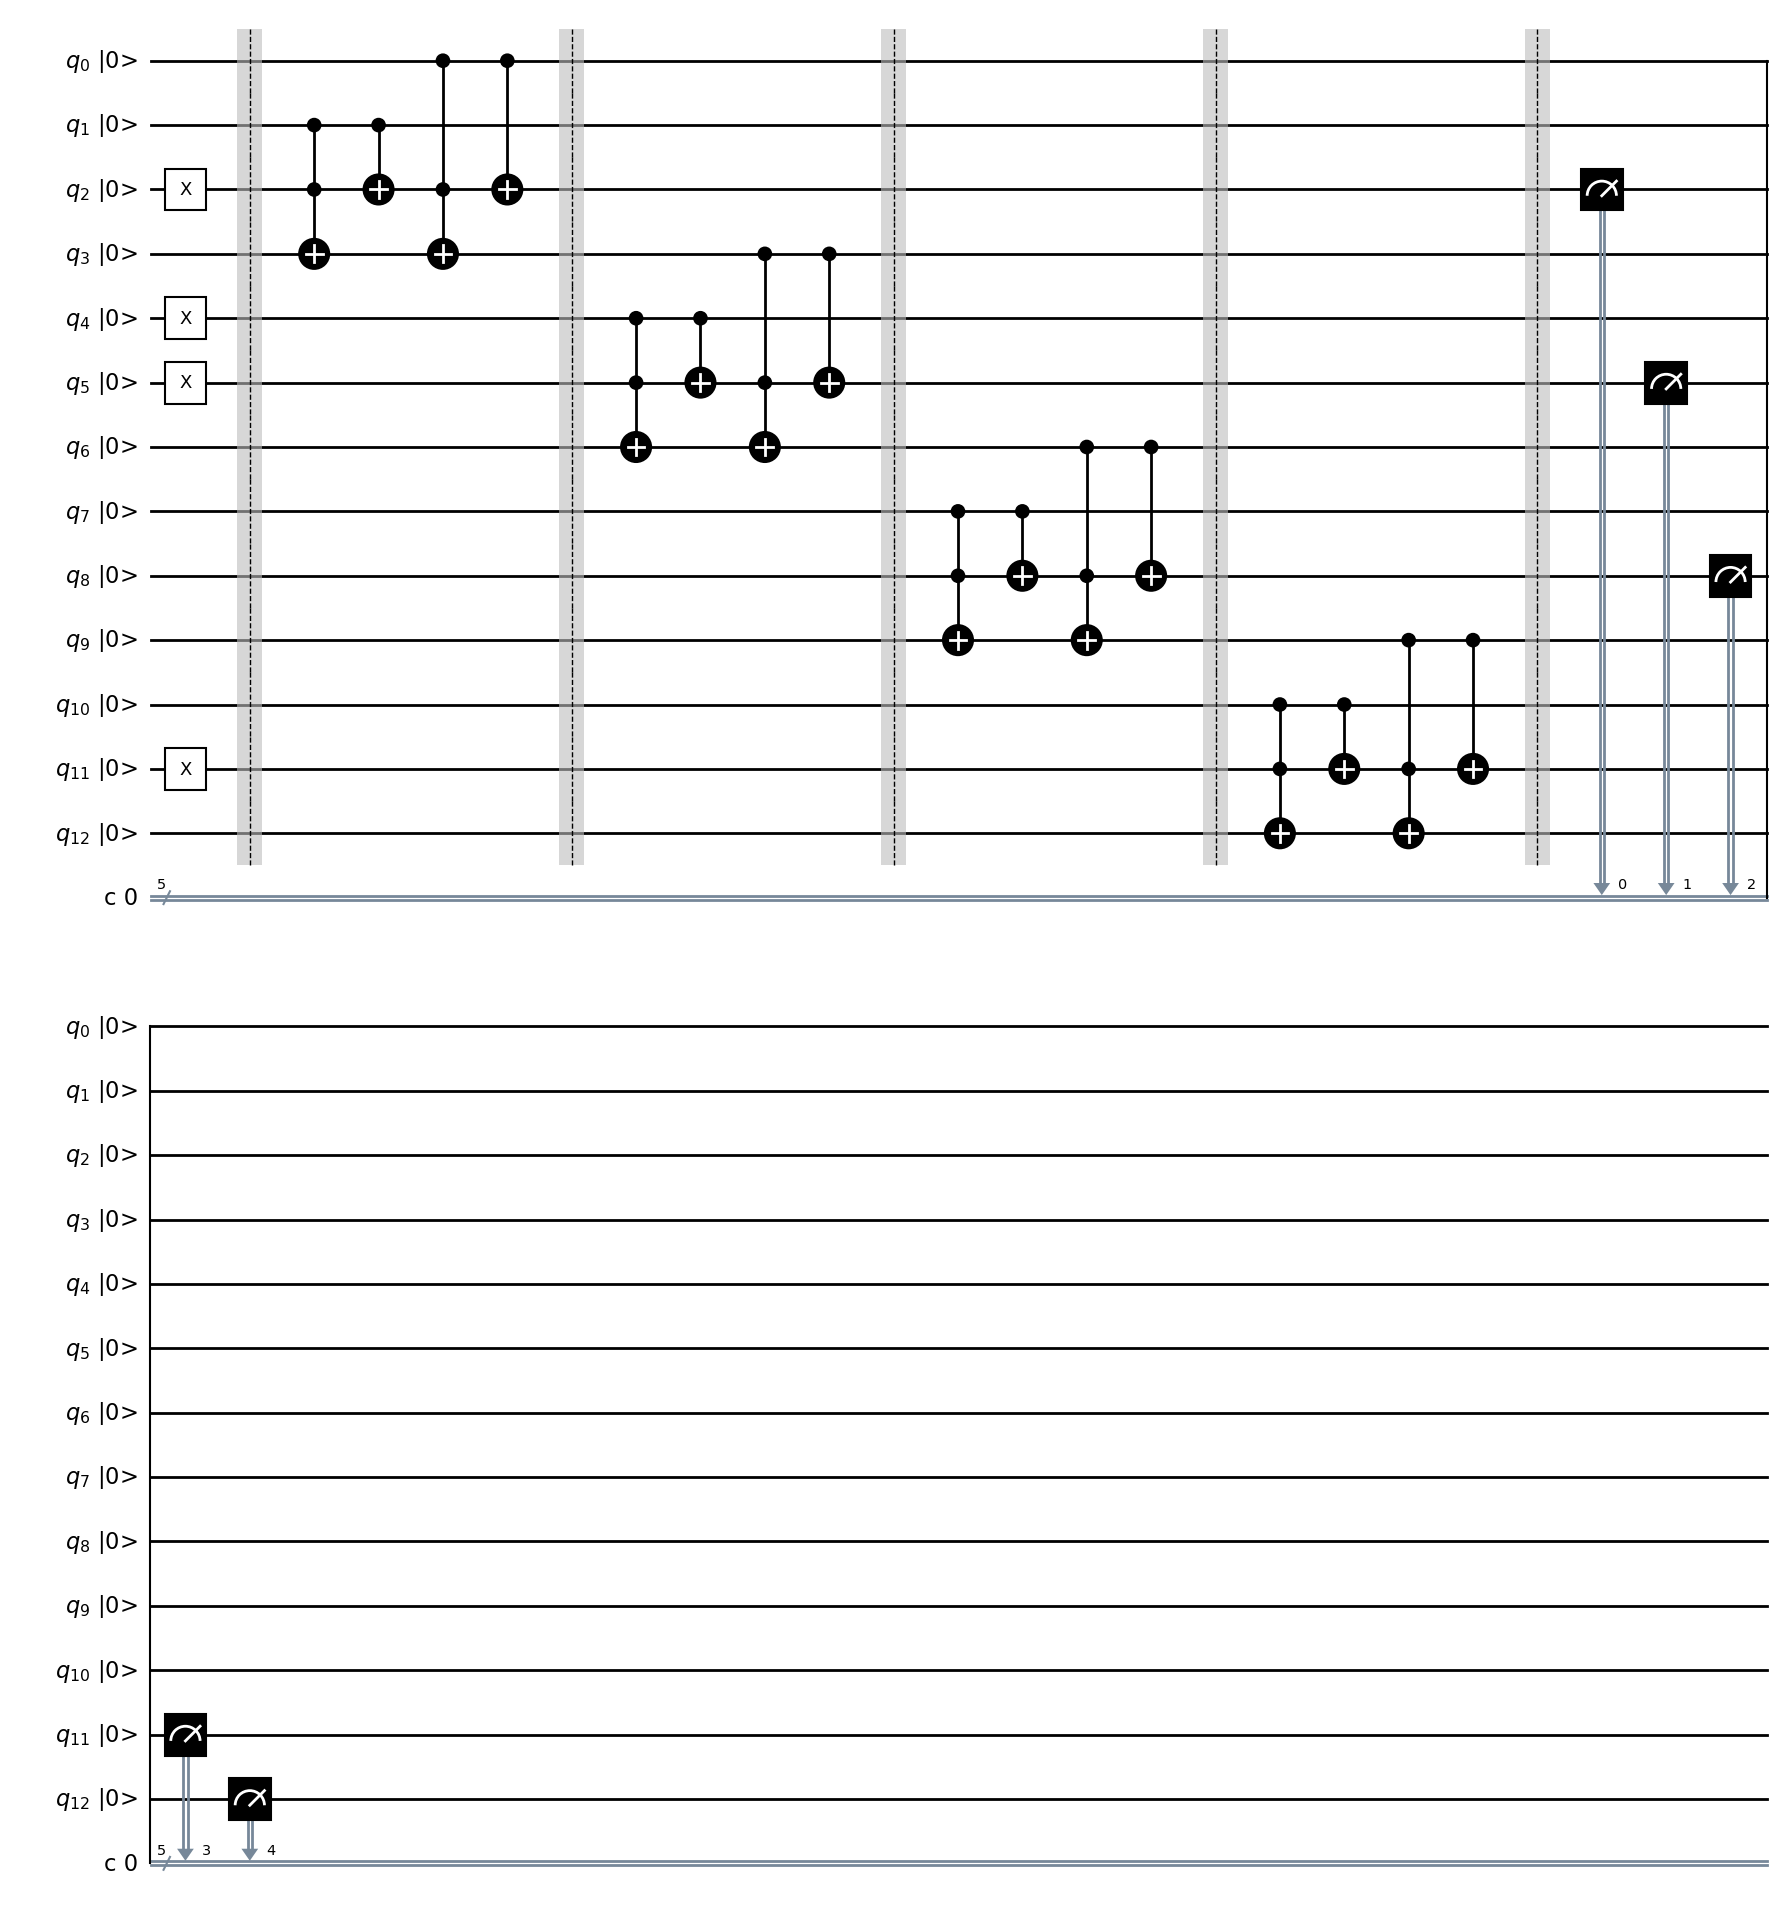
We run the circuit for test case 1:

In [ ]:
#4-bit ripple carry adder

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Test Case 1
a = "0010"
b = "1011"

fa = QuantumCircuit(13)
fa1 = QuantumCircuit(4)
fa2 = QuantumCircuit(4)
fa3 = QuantumCircuit(4)
fa4 = QuantumCircuit(4)
meas = QuantumCircuit(13,5)

#Initialising qubits as per test case
for i in range(4):
    if(a[i]=='1'):
        fa.x(10-3*i)
    if(b[i]=='1'):
        fa.x(11-3*i)

fa.barrier()

#Using four quantum full adder
fa1.ccx(1,2,3)
fa1.cx(1,2)
fa1.ccx(0,2,3)
fa1.cx(0,2)

fa2.ccx(1,2,3)
fa2.cx(1,2)
fa2.ccx(0,2,3)
fa2.cx(0,2)

fa3.ccx(1,2,3)
fa3.cx(1,2)
fa3.ccx(0,2,3)
fa3.cx(0,2)

fa4.ccx(1,2,3)
fa4.cx(1,2)
fa4.ccx(0,2,3)
fa4.cx(0,2)

qc1 = fa.compose(fa1, range(4))
qc1.barrier()

qc2 = qc1.compose(fa2, range(3,7))
qc2.barrier()

qc3 = qc2.compose(fa3, range(6,10))
qc3.barrier()

qc4 = qc3.compose(fa4, range(9,13))
qc4.barrier()

#measuring the qubits
meas.measure([2,5,8,11,12],range(5))

qc = meas.compose(qc4, range(13), front=True)

#simulating the final circuit
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)

For test case 2:

In [ ]:
#4-bit ripple carry adder

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Test Case 2
a = "0001"
b = "0011"

fa = QuantumCircuit(13)
fa1 = QuantumCircuit(4)
fa2 = QuantumCircuit(4)
fa3 = QuantumCircuit(4)
fa4 = QuantumCircuit(4)
meas = QuantumCircuit(13,5)

#Initialising qubits as per test case
for i in range(4):
    if(a[i]=='1'):
        fa.x(10-3*i)
    if(b[i]=='1'):
        fa.x(11-3*i)

fa.barrier()

#Using four quantum full adder
fa1.ccx(1,2,3)
fa1.cx(1,2)
fa1.ccx(0,2,3)
fa1.cx(0,2)

fa2.ccx(1,2,3)
fa2.cx(1,2)
fa2.ccx(0,2,3)
fa2.cx(0,2)

fa3.ccx(1,2,3)
fa3.cx(1,2)
fa3.ccx(0,2,3)
fa3.cx(0,2)

fa4.ccx(1,2,3)
fa4.cx(1,2)
fa4.ccx(0,2,3)
fa4.cx(0,2)

qc1 = fa.compose(fa1, range(4))
qc1.barrier()

qc2 = qc1.compose(fa2, range(3,7))
qc2.barrier()

qc3 = qc2.compose(fa3, range(6,10))
qc3.barrier()

qc4 = qc3.compose(fa4, range(9,13))
qc4.barrier()

#measuring the qubits
meas.measure([2,5,8,11,12],range(5))

qc = meas.compose(qc4, range(13), front=True)

#simulating the final circuit
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)

For test case 3:

In [ ]:
#4-bit ripple carry adder

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

fa = QuantumCircuit(13)
fa1 = QuantumCircuit(4)
fa2 = QuantumCircuit(4)
fa3 = QuantumCircuit(4)
fa4 = QuantumCircuit(4)
meas = QuantumCircuit(13,5)

#|a> = (|0010> + |0100>)/sqrt(2)
fa.x(7)
fa.h(4)
fa.cx(4,7)

#|b> = (|1011> + |0001>)/sqrt(2)
fa.x(2)
fa.h(5)
fa.cx(5,11)

fa.barrier()
        
fa1.ccx(1,2,3)
fa1.cx(1,2)
fa1.ccx(0,2,3)
fa1.cx(0,2)

fa2.ccx(1,2,3)
fa2.cx(1,2)
fa2.ccx(0,2,3)
fa2.cx(0,2)

fa3.ccx(1,2,3)
fa3.cx(1,2)
fa3.ccx(0,2,3)
fa3.cx(0,2)

fa4.ccx(1,2,3)
fa4.cx(1,2)
fa4.ccx(0,2,3)
fa4.cx(0,2)

qc1 = fa.compose(fa1, range(4))
qc1.barrier()

qc2 = qc1.compose(fa2, range(3,7))
qc2.barrier()

qc3 = qc2.compose(fa3, range(6,10))
qc3.barrier()

qc4 = qc3.compose(fa4, range(9,13))
qc4.barrier()

meas.measure([2,5,8,11,12],range(5))

qc = meas.compose(qc4, range(13), front=True)

backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)

For test case 4:

In [ ]:
#4-bit ripple carry adder

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

fa = QuantumCircuit(13)
fa1 = QuantumCircuit(4)
fa2 = QuantumCircuit(4)
fa3 = QuantumCircuit(4)
fa4 = QuantumCircuit(4)
meas = QuantumCircuit(13,5)

#|a> = (|0000> + |0111>)/sqrt(2)
fa.h(7)
fa.cx(7,4)
fa.cx(7,1)

#|b> = (|0111> + |1000>)/sqrt(2)
fa.x(2)
fa.x(5)
fa.x(8)
fa.h(11)
fa.cx(11,7)
fa.cx(11,4)
fa.cx(11,2)

fa.barrier()
        
fa1.ccx(1,2,3)
fa1.cx(1,2)
fa1.ccx(0,2,3)
fa1.cx(0,2)

fa2.ccx(1,2,3)
fa2.cx(1,2)
fa2.ccx(0,2,3)
fa2.cx(0,2)

fa3.ccx(1,2,3)
fa3.cx(1,2)
fa3.ccx(0,2,3)
fa3.cx(0,2)

fa4.ccx(1,2,3)
fa4.cx(1,2)
fa4.ccx(0,2,3)
fa4.cx(0,2)

qc1 = fa.compose(fa1, range(4))
qc1.barrier()

qc2 = qc1.compose(fa2, range(3,7))
qc2.barrier()

qc3 = qc2.compose(fa3, range(6,10))
qc3.barrier()

qc4 = qc3.compose(fa4, range(9,13))
qc4.barrier()

meas.measure([2,5,8,11,12],range(5))

qc = meas.compose(qc4, range(13), front=True)

qc.draw(output = 'mpl', style={'name': 'bw'}, plot_barriers= True, initial_state = True, scale = 1)

backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)

Next, for bonus task 1, let us take test case 1, i.e |a> = |0010>, |b> = |1011> and entangle the second last qubits (i.e a1 and b1). On simulating the circuit, we get the following results.

In [ ]:
#4-bit ripple carry adder

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Test Case 1
a = "0010"
b = "1011"

fa = QuantumCircuit(13)
fa1 = QuantumCircuit(4)
fa2 = QuantumCircuit(4)
fa3 = QuantumCircuit(4)
fa4 = QuantumCircuit(4)
meas = QuantumCircuit(13,5)

#Initialising qubits as per test case
for i in range(4):
    if(a[i]=='1'):
        fa.x(10-3*i)
    if(b[i]=='1'):
        fa.x(11-3*i)

fa.barrier()

#Entangling a1 and b1
fa.h(5)
fa.cx(5,4)

#Using four quantum full adder
fa1.ccx(1,2,3)
fa1.cx(1,2)
fa1.ccx(0,2,3)
fa1.cx(0,2)

fa2.ccx(1,2,3)
fa2.cx(1,2)
fa2.ccx(0,2,3)
fa2.cx(0,2)

fa3.ccx(1,2,3)
fa3.cx(1,2)
fa3.ccx(0,2,3)
fa3.cx(0,2)

fa4.ccx(1,2,3)
fa4.cx(1,2)
fa4.ccx(0,2,3)
fa4.cx(0,2)

qc1 = fa.compose(fa1, range(4))
qc1.barrier()

qc2 = qc1.compose(fa2, range(3,7))
qc2.barrier()

qc3 = qc2.compose(fa3, range(6,10))
qc3.barrier()

qc4 = qc3.compose(fa4, range(9,13))
qc4.barrier()

#measuring the qubits
meas.measure([2,5,8,11,12],range(5))

qc = meas.compose(qc4, range(13), front=True)

#simulating the final circuit
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)

The reason for this result is that on entangling two qubits in state 1, we get Ψ- state. Thus the circuit thinks that 50% of the time, a1=1, b1=0 and 50% of time a1=0, b1=1, thus giving us the sum as 1011.

Next, for bonus task 2, we first design a carry lookahead generator:

In [ ]:
#Carry lookahead generator
from qiskit import QuantumCircuit

cg = QuantumCircuit(13)

cg.cx(1,3)
cg.ccx(0,2,3)
cg.barrier()
cg.cx(4,6)
cg.ccx(1,5,6)
cg.mcx([0,2,5],6)
cg.barrier()
cg.cx(7,9)
cg.ccx(4,8,9)
cg.mcx([1,5,8],9)
cg.mcx([0,2,5,8],9)
cg.barrier()
cg.cx(10,12)
cg.ccx(7,11,12)
cg.mcx([4,8,11],12)
cg.mcx([1,5,8,11],12)
cg.mcx([0,2,5,8,11],12)

cg.draw(output = 'mpl', style={'name': 'bw'}, plot_barriers= True, initial_state = True, scale = 1)

After this, we create the carry lookahead adder. The circuit for this is:
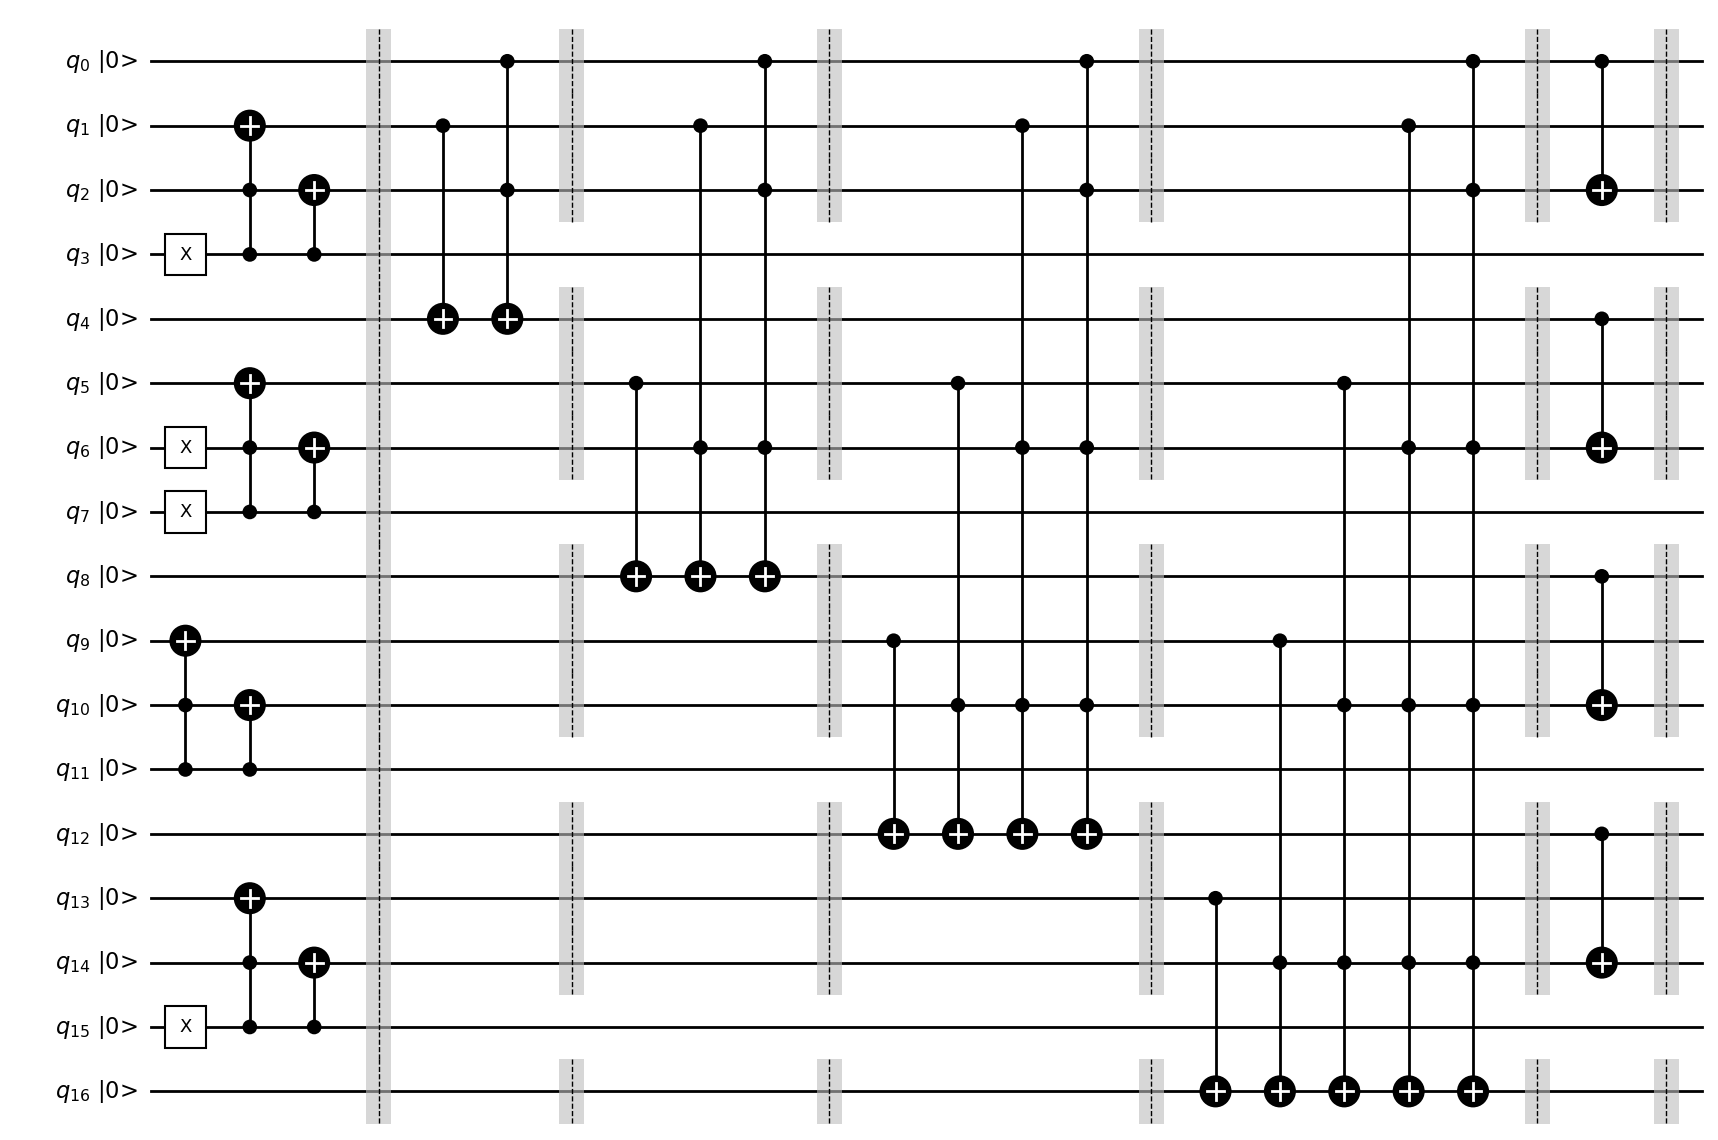

Comparing this to the ripple carry adder, we see that the former used 16 gates, while this one uses 26 gates. In general for n-bit adder, we can say that the ripple carry adder requires 4n gates, while carry lookahead adder requires n(n+9)/2 gates.
Below, the carry lookahead adder implements the test cases 1,2,3 and 4 respectively.

In [ ]:
#Carry Lookahead Adder

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

cpg = QuantumCircuit(17)
cla = QuantumCircuit(13)
meas = QuantumCircuit(17,5)

a = "0010"
b = "1011"

#Initialising the qubits
for i in range(4):
    if(a[i]=='1'):
        cpg.x(14-4*i)
    if(b[i]=='1'):
        cpg.x(15-4*i)

#Circuit that generates carry propogate and generate
cpg.ccx(3,2,1)    #G_0
cpg.cx(3,2)       #P_0
cpg.ccx(7,6,5)    #G_1
cpg.cx(7,6)       #P_1
cpg.ccx(11,10,9)  #G_2
cpg.cx(11,10)     #P_2
cpg.ccx(15,14,13) #G_3
cpg.cx(15,14)     #P_3
cpg.barrier()

#Circuit that generates carry lookahead
cla.cx(1,3)
cla.ccx(0,2,3)           #C_1
cla.barrier()
cla.cx(4,6)
cla.ccx(1,5,6)
cla.mcx([0,2,5],6)       #C_2
cla.barrier()
cla.cx(7,9)
cla.ccx(4,8,9)
cla.mcx([1,5,8],9)
cla.mcx([0,2,5,8],9)     #C_3
cla.barrier()
cla.cx(10,12)
cla.ccx(7,11,12)
cla.mcx([4,8,11],12)
cla.mcx([1,5,8,11],12)
cla.mcx([0,2,5,8,11],12) #C_4
cla.barrier()

#Sum calculate
cla.cx(0,2)  #S_0
cla.cx(3,5)  #S_1
cla.cx(6,8)  #S_3
cla.cx(9,11) #S_4
cla.barrier()

qc1 = cpg.compose(cla, [0,1,2,4,5,6,8,9,10,12,13,14,16])

meas.measure([2,6,10,14,16], range(5))

qc = meas.compose(qc1, range(17), front=True)

#Simulating the circuit
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)

In [ ]:
#Carry Lookahead Adder

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

cpg = QuantumCircuit(17)
cla = QuantumCircuit(13)
meas = QuantumCircuit(17,5)

a = "0001"
b = "0011"

#Initialising the qubits
for i in range(4):
    if(a[i]=='1'):
        cpg.x(14-4*i)
    if(b[i]=='1'):
        cpg.x(15-4*i)

#Circuit that generates carry propogate and generate
cpg.ccx(3,2,1)    #G_0
cpg.cx(3,2)       #P_0
cpg.ccx(7,6,5)    #G_1
cpg.cx(7,6)       #P_1
cpg.ccx(11,10,9)  #G_2
cpg.cx(11,10)     #P_2
cpg.ccx(15,14,13) #G_3
cpg.cx(15,14)     #P_3
cpg.barrier()

#Circuit that generates carry lookahead
cla.cx(1,3)
cla.ccx(0,2,3)           #C_1
cla.barrier()
cla.cx(4,6)
cla.ccx(1,5,6)
cla.mcx([0,2,5],6)       #C_2
cla.barrier()
cla.cx(7,9)
cla.ccx(4,8,9)
cla.mcx([1,5,8],9)
cla.mcx([0,2,5,8],9)     #C_3
cla.barrier()
cla.cx(10,12)
cla.ccx(7,11,12)
cla.mcx([4,8,11],12)
cla.mcx([1,5,8,11],12)
cla.mcx([0,2,5,8,11],12) #C_4
cla.barrier()

#Sum calculate
cla.cx(0,2)  #S_0
cla.cx(3,5)  #S_1
cla.cx(6,8)  #S_3
cla.cx(9,11) #S_4
cla.barrier()

qc1 = cpg.compose(cla, [0,1,2,4,5,6,8,9,10,12,13,14,16])

meas.measure([2,6,10,14,16], range(5))

qc = meas.compose(qc1, range(17), front=True)

#Simulating the circuit
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)

In [ ]:
#Carry Lookahead Adder

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

cpg = QuantumCircuit(17)
cla = QuantumCircuit(13)
meas = QuantumCircuit(17,5)

#|a> = (|0010> + |0100>)/sqrt(2)
cpg.x(10)
cpg.h(6)
cpg.cx(6,10)

#|b> = (|1011> + |0001>)/sqrt(2)
cpg.x(3)
cpg.h(7)
cpg.cx(7,15)

#Circuit that generates carry propogate and generate
cpg.ccx(3,2,1)    #G_0
cpg.cx(3,2)       #P_0
cpg.ccx(7,6,5)    #G_1
cpg.cx(7,6)       #P_1
cpg.ccx(11,10,9)  #G_2
cpg.cx(11,10)     #P_2
cpg.ccx(15,14,13) #G_3
cpg.cx(15,14)     #P_3
cpg.barrier()

#Circuit that generates carry lookahead
cla.cx(1,3)
cla.ccx(0,2,3)           #C_1
cla.barrier()
cla.cx(4,6)
cla.ccx(1,5,6)
cla.mcx([0,2,5],6)       #C_2
cla.barrier()
cla.cx(7,9)
cla.ccx(4,8,9)
cla.mcx([1,5,8],9)
cla.mcx([0,2,5,8],9)     #C_3
cla.barrier()
cla.cx(10,12)
cla.ccx(7,11,12)
cla.mcx([4,8,11],12)
cla.mcx([1,5,8,11],12)
cla.mcx([0,2,5,8,11],12) #C_4
cla.barrier()

#Sum calculate
cla.cx(0,2)  #S_0
cla.cx(3,5)  #S_1
cla.cx(6,8)  #S_3
cla.cx(9,11) #S_4
cla.barrier()

qc1 = cpg.compose(cla, [0,1,2,4,5,6,8,9,10,12,13,14,16])

meas.measure([2,6,10,14,16], range(5))

qc = meas.compose(qc1, range(17), front=True)

qc.draw(output = 'mpl', style={'name': 'bw'}, plot_barriers= True, initial_state = True, scale = 1)

#Simulating the circuit
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)

In [ ]:
#Carry Lookahead Adder

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

cpg = QuantumCircuit(17)
cla = QuantumCircuit(13)
meas = QuantumCircuit(17,5)

#|a> = (|0000> + |0111>)/sqrt(2)
cpg.h(10)
cpg.cx(10,6)
cpg.cx(10,2)

#|b> = (|0111> + |1000>)/sqrt(2)
cpg.x(3)
cpg.x(7)
cpg.x(11)
cpg.h(15)
cpg.cx(15,10)
cpg.cx(15,6)
cpg.cx(15,3)

#Circuit that generates carry propogate and generate
cpg.ccx(3,2,1)    #G_0
cpg.cx(3,2)       #P_0
cpg.ccx(7,6,5)    #G_1
cpg.cx(7,6)       #P_1
cpg.ccx(11,10,9)  #G_2
cpg.cx(11,10)     #P_2
cpg.ccx(15,14,13) #G_3
cpg.cx(15,14)     #P_3
cpg.barrier()

#Circuit that generates carry lookahead
cla.cx(1,3)
cla.ccx(0,2,3)           #C_1
cla.barrier()
cla.cx(4,6)
cla.ccx(1,5,6)
cla.mcx([0,2,5],6)       #C_2
cla.barrier()
cla.cx(7,9)
cla.ccx(4,8,9)
cla.mcx([1,5,8],9)
cla.mcx([0,2,5,8],9)     #C_3
cla.barrier()
cla.cx(10,12)
cla.ccx(7,11,12)
cla.mcx([4,8,11],12)
cla.mcx([1,5,8,11],12)
cla.mcx([0,2,5,8,11],12) #C_4
cla.barrier()

#Sum calculate
cla.cx(0,2)  #S_0
cla.cx(3,5)  #S_1
cla.cx(6,8)  #S_3
cla.cx(9,11) #S_4
cla.barrier()

qc1 = cpg.compose(cla, [0,1,2,4,5,6,8,9,10,12,13,14,16])

meas.measure([2,6,10,14,16], range(5))

qc = meas.compose(qc1, range(17), front=True)

qc.draw(output = 'mpl', style={'name': 'bw'}, plot_barriers= True, initial_state = True, scale = 1)

#Simulating the circuit
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)